In [72]:
import cv2
from matplotlib import pyplot as plt
import math
import random
import numpy as np

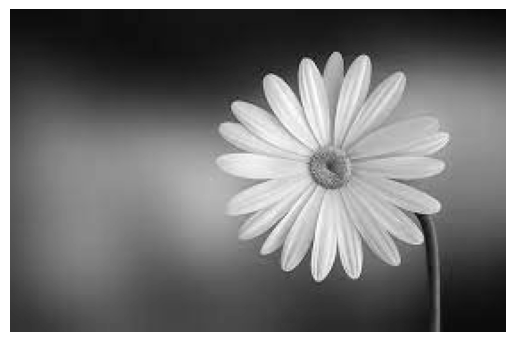

In [73]:
img = cv2.imread("flower.jpg" , 0)
plt.imshow(img , cmap = "gray")
plt.axis('off')
plt.show()

In [74]:
h , w = img.shape

In [75]:
#high pass mask
hp_mask = np.ones([3,3] , dtype= int)
hp_mask = -1 * hp_mask 
hp_mask[1,1] = -8 * hp_mask[1,1]
hp_mask

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

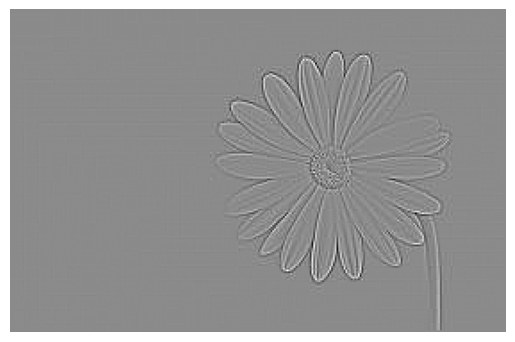

In [76]:
#high pass image
hp_img = np.zeros(img.shape)
for i in range(1, h-1):
    for j in range(1,w-1):
        temp = img[i-1 , j-1]*hp_mask[0 , 0] + img[i-1 , j]*hp_mask[0 , 1] + img[i-1 , j+1]*hp_mask[0 , 2] + img[i , j-1]*hp_mask[1 , 0]   + img[i , j]*hp_mask[1 , 1]   + img[i , j+1]*hp_mask[1 , 2] +img[i+1 , j-1]*hp_mask[2 , 0] + img[i+1 , j]*hp_mask[2 , 1] + img[i+1 , j+1]*hp_mask[2 , 2] 
        hp_img[i][j] = temp
plt.imshow(hp_img , cmap = "gray")
plt.axis('off')
plt.show()

In [77]:
#high boost mask
a = 1.1
hb_mask = np.ones([3,3] )
hb_mask = -1 * hb_mask 
hb_mask[1,1] = -(8 + a) * hb_mask[1,1]
hb_mask

array([[-1. , -1. , -1. ],
       [-1. ,  9.1, -1. ],
       [-1. , -1. , -1. ]])

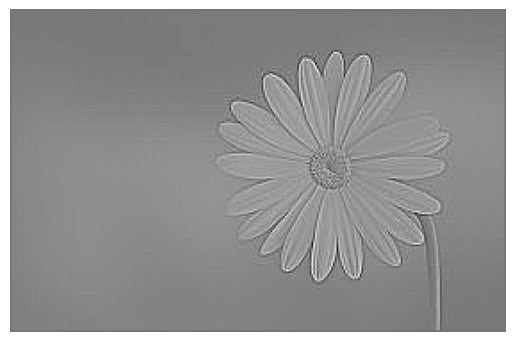

In [78]:
#high boost image
hb_img = np.zeros(img.shape)
for i in range(1, h-1):
    for j in range(1,w-1):
        temp = img[i-1 , j-1]*hb_mask[0 , 0] + img[i-1 , j]*hb_mask[0 , 1] + img[i-1 , j+1]*hb_mask[0 , 2] + img[i , j-1]*hb_mask[1 , 0]   + img[i , j]*hb_mask[1 , 1]   + img[i , j+1]*hb_mask[1 , 2] +img[i+1 , j-1]*hb_mask[2 , 0] + img[i+1 , j]*hb_mask[2 , 1] + img[i+1 , j+1]*hb_mask[2 , 2] 
        hb_img[i][j] = temp
plt.imshow(hb_img , cmap = "gray")
plt.axis('off')
plt.show()

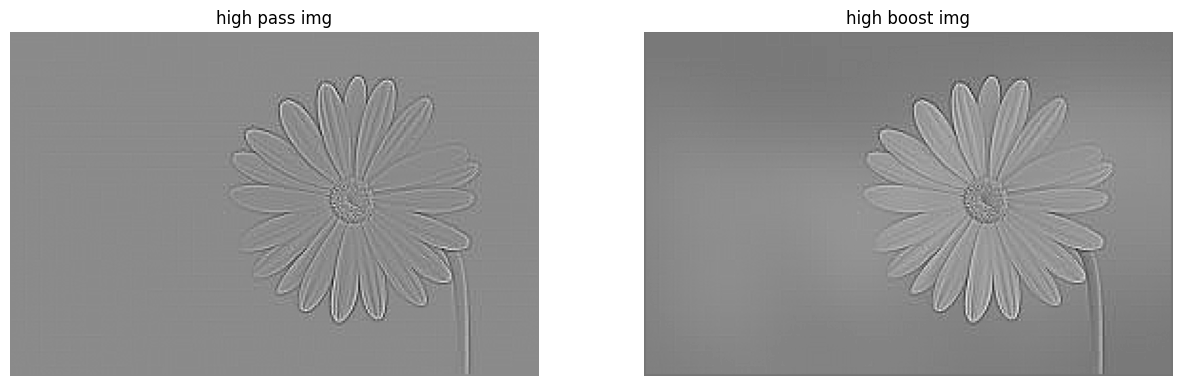

In [89]:
#comparing high pass and high boost images

fig = plt.figure(figsize =(15,10))
rows = 1
cols = 2

fig.add_subplot(rows, cols , 1)
plt.imshow(hp_img , cmap = "gray")
plt.axis('off')
plt.title("high pass img")

fig.add_subplot(rows, cols , 2)
plt.imshow(hb_img , cmap = "gray")
plt.axis('off')
plt.title("high boost img")

plt.show()